<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-03/Ejemplo-04/graficando_multiples_axis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 4: Graficando con múltiples axis

### 1. Objetivos:
    - Aprender a generar varias gráficas al mismo tiempo para hacer comparaciones.

---
    
### 2. Desarrollo:

Tomemos la primera tabla de contingencia del Ejemplo pasado para graficarla:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
path='https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/Datasets/'
df = pd.read_json(path + 'zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [3]:
crosstab = pd.crosstab(df['price_range'], df['user_rating'])

crosstab

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


¿Recuerdas el objeto `figure`? Bueno, si `figure` es el objeto que contiene nuestras gráficas, los objetos `axes` son los encargados de dibujar cada una de las gráficas. `figure` contiene `axes` y nuestras gráficas se dibujan sobre los `axes`.

Usando el método `subplots`, podemos generar al mismo tiempo una nueva figura y múltiples `axes` que están contenidos en esa figura:

Le pasamos a `subplots` la estructura de nuestra 'tabla' de gráficas. En este caso, le indicamos un entramado de 2 x 2 porque tenemos 4 valores en el primer nivel.

Grafiquemos:

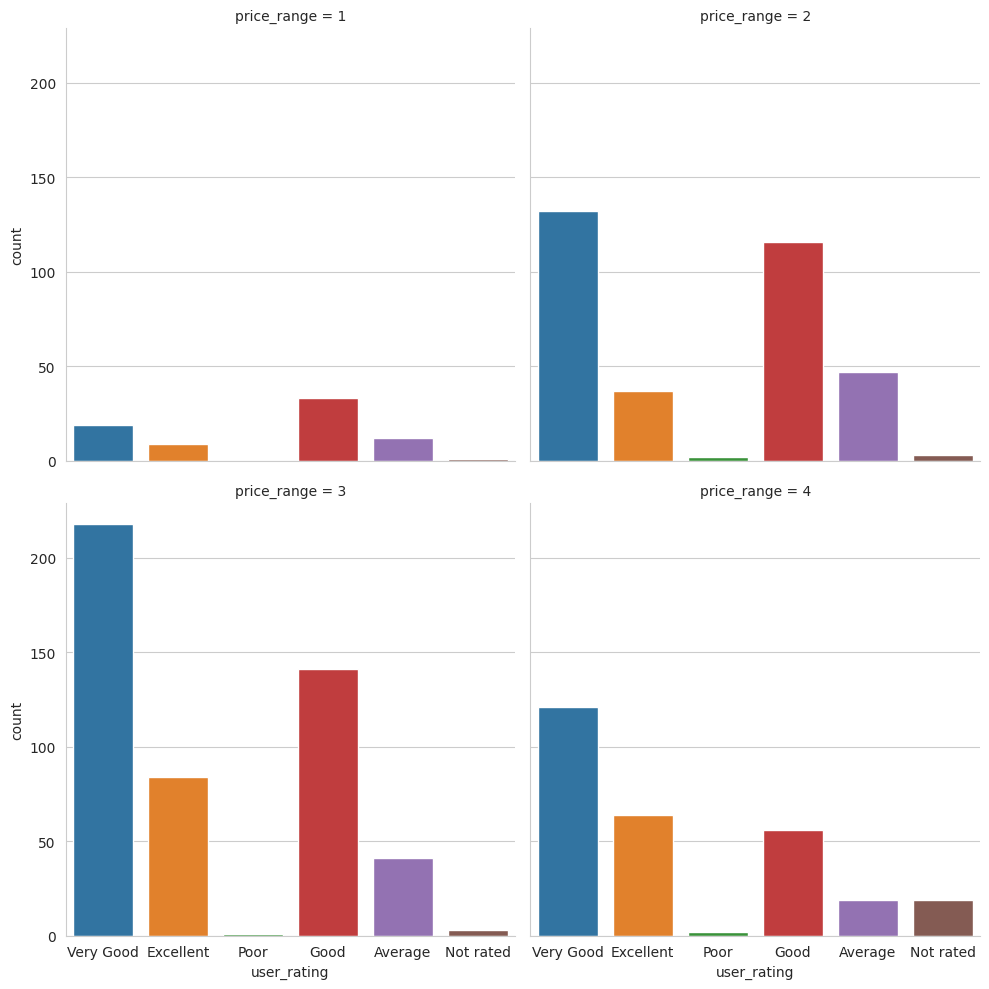

In [4]:
sns.catplot(data=df, x='user_rating', col='price_range',
            kind='count',  # tipo de grafica
            col_wrap=2) # partes, agrupacion

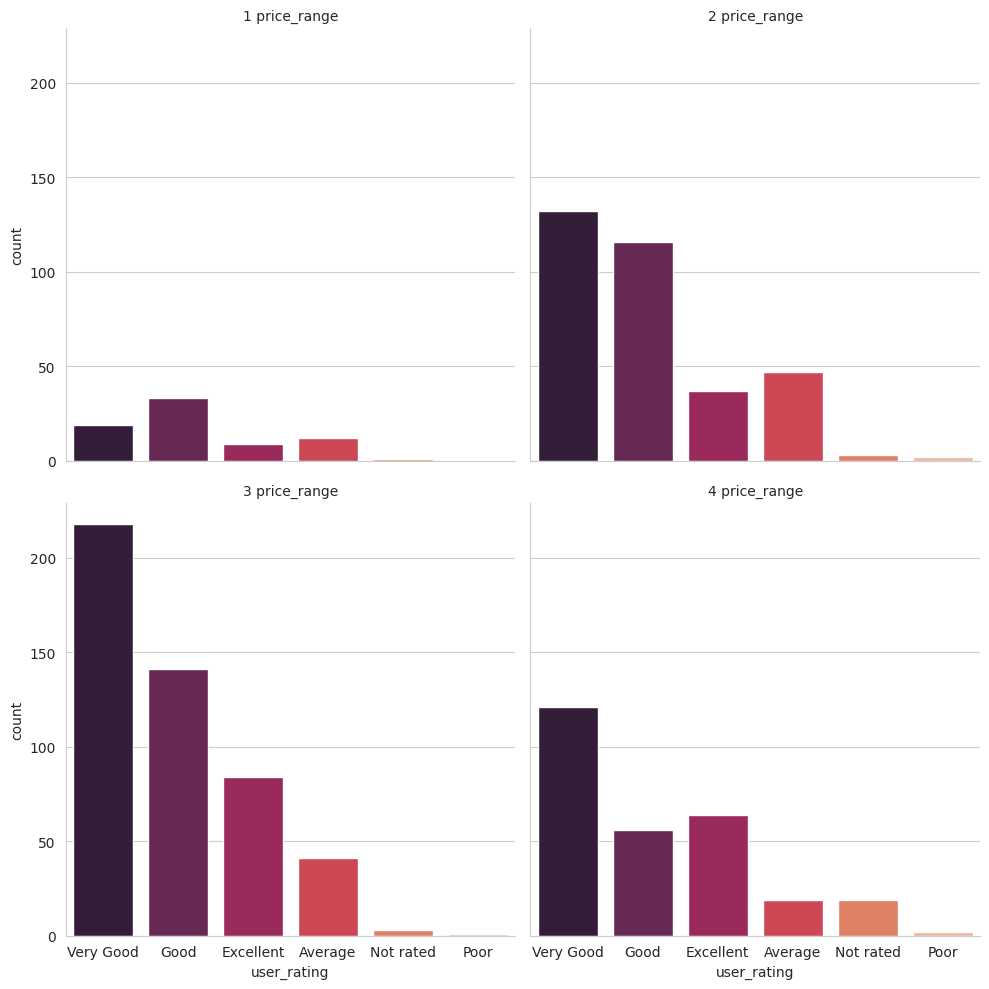

In [5]:
g = sns.catplot(data=df,
                x='user_rating',
                col='price_range',
                order=df['user_rating'].value_counts().index,
                kind='count',
                palette='rocket',
                col_wrap=2)
g.set_titles("{col_name} {col_var}")


Cosas importantes a notar:

1. Agregamos las banderas `sharex` y `sharey` porque tenemos el mismo eje x para todas nuestras gráficas y porque queremos comparar las gráficas una contra otra. Si nuestro eje y no fuera igual para todas, sería más difícil comparar usando sólo la vista.
2. La variable `axes` contiene un arreglo de dos dimensiones con cada uno de nuestros `ax` (el contenedor de cada gráfica). Así como accedemos a cualquier arreglo de 2 dimensiones, acceder a un `ax` se lleva a cabo de esta manera: `axes[0, 1]`.
3. Eliminamos los `xlabels` y los `ylabels` porque no son muy informativos y generan ruido visual. En cambio, cada gráfica necesita un título para saber a qué categoría del primer nivel pertenece.